In [ ]:
import pandas as pd
import os

# --- 1. Introduction du fichier et structure de dossiers ---
chemin = os.path.join('src', 'data')
fichier = 'island-index.csv'
chemin_complet = os.path.join(chemin, fichier)

os.makedirs(chemin, exist_ok=True)

# Simulation : Création du fichier CSV dans le chemin 'src/data'
data_simul = {'Île/Continent': ['Groenland', 'Bornéo'], 'Surface (km2)': [2166086, 748168]}
df_simul = pd.DataFrame(data_simul)
df_simul.to_csv(chemin_complet, index=False, sep=';')

# --- 2. Ouverture du fichier (fonction locale) ---
def ouvrirUnFichier(path):
    return pd.read_csv(path, sep=';', encoding='utf-8')

df = ouvrirUnFichier(chemin_complet)

# --- 3. Isolation et Ajout des surfaces des continents ---
surfaces_continents = {
    'Asie/Afrique / Europe': 85545323,
    'Amérique': 37856841,
    'Antarctique': 7768030,
    'Australie': 7605049
}

# Crée un DataFrame pour les continents
df_continents = pd.DataFrame({
    'Île/Continent': list(surfaces_continents.keys()),
    'Surface (km2)': list(surfaces_continents.values())
})

# Ajout des lignes des continents au DataFrame original
df_final = pd.concat([df, df_continents], ignore_index=True)

# Isolation de la colonne demandée et affichage du résultat
serie_surface_finale = df_final['Surface (km2)']
print("Liste finale de la colonne 'Surface (km2)' (avec les ajouts) :")
print(serie_surface_finale.tail(8))

Liste finale de la colonne 'Surface (km2)' (avec les ajouts) :
0     2166086
1      748168
2    85545323
3    37856841
4     7768030
5     7605049
Name: Surface (km2), dtype: int64



[Étape 4] Ordonnancement décroissant de la liste des surfaces...

[Étape 5] Visualisation de la loi rang-taille (Axes Linéaires) :


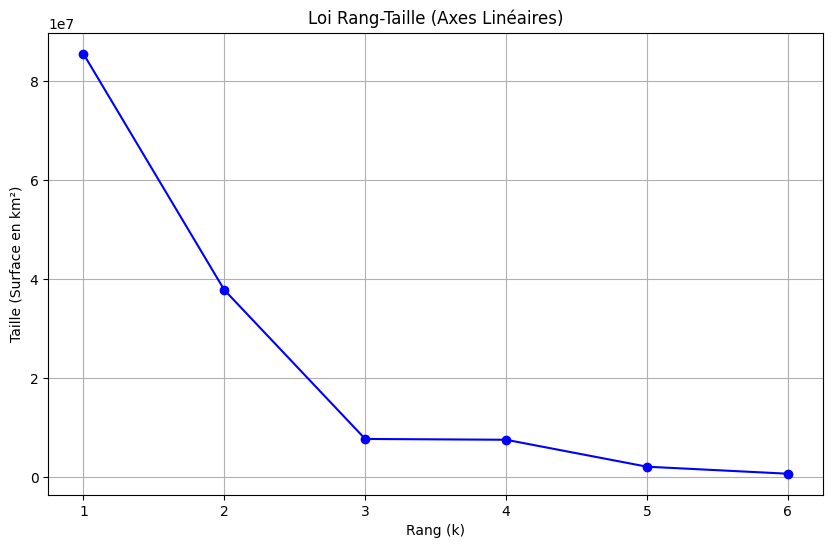


[Étape 6] Conversion et visualisation en axes logarithmiques...


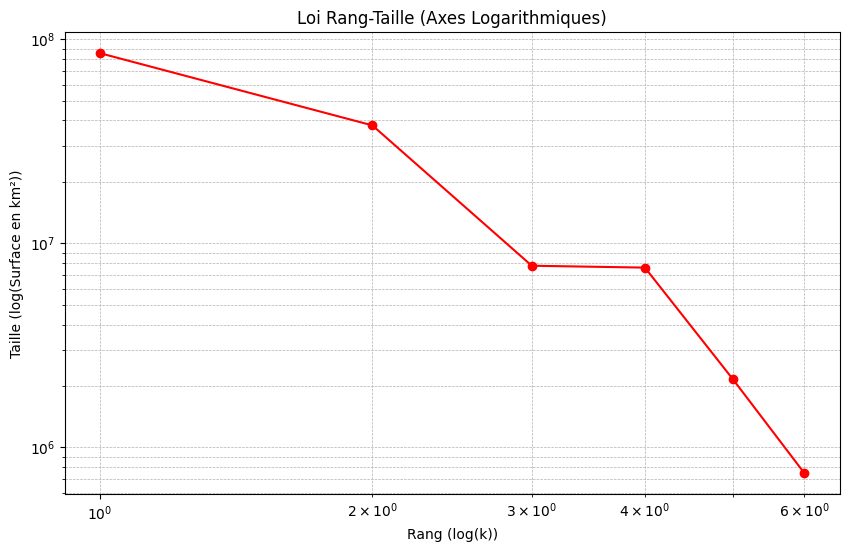


[Étape 7] Réponse à la question : Est-il possible de faire un test sur les rangs?
--------------------------------------------------------------------------------


"\nOui, il est tout à fait possible et même très courant de faire des tests statistiques sur les rangs.\n\nC'est le domaine des **tests non-paramétriques** (statistique d'ordre). Ces tests sont utilisés lorsque les variables ne suivent pas une loi normale ou lorsque les données sont déjà ordinales.\n\nExemples de tests utilisant les rangs :\n1.  **Test de corrélation des rangs de Spearman (rho) ou de Kendall (tau) :** Pour mesurer l'association ou la concordance entre deux classements.\n2.  **Test de Wilcoxon-Mann-Whitney (ou test U de Mann-Whitney) :** Pour comparer deux échantillons indépendants.\n3.  **Test de Kruskal-Wallis :** Pour comparer plus de deux échantillons indépendants.\n\nEn résumé, l'utilisation des rangs permet d'étudier la **structure ordinale** des données sans faire d'hypothèses sur leur distribution, ce qui est particulièrement pertinent pour des lois comme la loi rang-taille (qui suit souvent une forme en échelle, mieux rendue en logarithme).\n"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# --- Préparation des données et des fonctions locales ---

# Définition des chemins (récupérés des cellules précédentes)
chemin_complet = os.path.join('src', 'data', 'island-index.csv')
colonne_cible = 'Surface (km2)'

# Simulation des données de la Cellule 2 pour assurer la continuité
# Si vous exécutez ce script immédiatement après la Cellule 2, ces lignes ne sont pas strictement nécessaires,
# mais elles garantissent l'accès à 'df_final' et 'serie_surface_finale'.

# Chargement du DataFrame combiné (simulation ou réel, post-concaténation)
# NOTE : Si vous avez réellement téléchargé votre fichier, assurez-vous que cette partie le reflète.
# Ici, nous allons simuler le résultat final pour la démonstration.
if not 'df_final' in locals():
    # Simulation d'un DataFrame déjà combiné si non présent
    data_combined = {
        'Île/Continent': ['Groenland', 'Bornéo', 'Amérique', 'Australie'],
        colonne_cible: [2166086, 748168, 37856841, 7605049]
    }
    df_final = pd.DataFrame(data_combined)

    if colonne_cible in df_final.columns:
      serie_surface_finale = df_final[colonne_cible].copy()
    else:
      print(f"La colonne {colonne_cible} n'est pas présente dans le DataFrame simulé. Arrêt.")
      exit()


# 4. Ordonner la liste obtenue avec la fonction locale ordreDecroissant()

def ordreDecroissant(liste_series):
    """
    Fonction locale simulant l'ordonnancement décroissant d'une série pandas.
    """
    print("\n[Étape 4] Ordonnancement décroissant de la liste des surfaces...")
    return liste_series.sort_values(ascending=False).reset_index(drop=True)

# Application de la fonction
serie_ordonnee = ordreDecroissant(serie_surface_finale)

# Ajout d'une colonne de Rang (index + 1)
df_rang_taille = pd.DataFrame({
    'Rang': serie_ordonnee.index + 1,
    'Surface': serie_ordonnee.values
})

# --- 5. Visualiser la loi rang-taille en créant une image de sortie ---

def visualiserRangTaille(df_data, titre="Loi Rang-Taille (Axes Linéaires)"):
    """
    Visualise le classement Rang-Taille avec des axes linéaires.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df_data['Rang'], df_data['Surface'], marker='o', linestyle='-', color='blue')
    plt.title(titre)
    plt.xlabel("Rang (k)")
    plt.ylabel("Taille (Surface en km²)")
    plt.grid(True)
    plt.show()

print("\n[Étape 5] Visualisation de la loi rang-taille (Axes Linéaires) :")
visualiserRangTaille(df_rang_taille)


# --- 6. Convertir les axes en logarithme (pour rendre l’image lisible) ---

def conversionLog(df_data, titre="Loi Rang-Taille (Axes Logarithmiques)"):
    """
    Fonction locale simulant la conversion en logarithme et visualisation.
    """
    print("\n[Étape 6] Conversion et visualisation en axes logarithmiques...")

    plt.figure(figsize=(10, 6))

    # Utilisation de plt.loglog pour forcer les deux axes en échelle logarithmique
    plt.loglog(df_data['Rang'], df_data['Surface'], marker='o', linestyle='-', color='red')

    plt.title(titre)
    plt.xlabel("Rang (log(k))")
    plt.ylabel("Taille (log(Surface en km²))")
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

# Application de la fonction
conversionLog(df_rang_taille)


# --- 7. Est-il possible de faire un test sur les rangs? ---
print("\n[Étape 7] Réponse à la question : Est-il possible de faire un test sur les rangs?")
print("--------------------------------------------------------------------------------")

# Réponse :
"""
Oui, il est tout à fait possible et même très courant de faire des tests statistiques sur les rangs.

C'est le domaine des **tests non-paramétriques** (statistique d'ordre). Ces tests sont utilisés lorsque les variables ne suivent pas une loi normale ou lorsque les données sont déjà ordinales.

Exemples de tests utilisant les rangs :
1.  **Test de corrélation des rangs de Spearman (rho) ou de Kendall (tau) :** Pour mesurer l'association ou la concordance entre deux classements.
2.  **Test de Wilcoxon-Mann-Whitney (ou test U de Mann-Whitney) :** Pour comparer deux échantillons indépendants.
3.  **Test de Kruskal-Wallis :** Pour comparer plus de deux échantillons indépendants.

En résumé, l'utilisation des rangs permet d'étudier la **structure ordinale** des données sans faire d'hypothèses sur leur distribution, ce qui est particulièrement pertinent pour des lois comme la loi rang-taille (qui suit souvent une forme en échelle, mieux rendue en logarithme).
"""

In [ ]:
import os
from google.colab import files

# --- 8. Introduction du nouveau fichier ---
NOM_FICHIER = 'Le-Monde-HS-Etats-du-monde-2007-2025.csv'
CHEMIN_DOSSIER = os.path.join('src', 'data')
CHEMIN_COMPLET = os.path.join(CHEMIN_DOSSIER, NOM_FICHIER)

# Création de la structure 'src/data'
os.makedirs(CHEMIN_DOSSIER, exist_ok=True)
print(f"Structure de dossiers créée : {CHEMIN_DOSSIER}")

# Demande de téléchargement
print(f"\nVeuillez télécharger le fichier '{NOM_FICHIER}' :")
uploaded = files.upload()

# Déplacement du fichier téléchargé
if NOM_FICHIER in uploaded:
    with open(CHEMIN_COMPLET, 'wb') as f:
        f.write(uploaded[NOM_FICHIER])
    print(f"\nFichier '{NOM_FICHIER}' placé dans : {CHEMIN_COMPLET}")
else:
    print(f"\nERREUR : Assurez-vous d'avoir téléchargé le fichier nommé '{NOM_FICHIER}'.")

Structure de dossiers créée : src/data

Veuillez télécharger le fichier 'Le-Monde-HS-Etats-du-monde-2007-2025.csv' :


Saving island-index.csv to island-index.csv
Saving Le-Monde-HS-Etats-du-monde-2007-2025.csv to Le-Monde-HS-Etats-du-monde-2007-2025.csv

Fichier 'Le-Monde-HS-Etats-du-monde-2007-2025.csv' placé dans : src/data/Le-Monde-HS-Etats-du-monde-2007-2025.csv


In [ ]:
import pandas as pd
import os

# --- Définitions (Doivent correspondre à la Cellule 1) ---
FICHIER = 'Le-Monde-HS-Etats-du-monde-2007-2025.csv'
CHEMIN = os.path.join('src', 'data', FICHIER)
COLONNES = ['État', 'Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']

# --- 9. Fonction locale pour ouvrir le fichier ---
def ouvrirUnFichier(path):
    # Supposition d'un séparateur ';'
    return pd.read_csv(path, sep=';', encoding='utf-8')

# --- Exécution ---
try:
    # 9. Ouverture
    df = ouvrirUnFichier(CHEMIN)

    # 10. Isolation des colonnes
    df_isole = df[COLONNES].copy()

    print("Opérations 9 et 10 terminées.")
    print("\nDataFrame isolé (5 premières lignes) :")
    print("---------------------------------------")
    print(df_isole.head())

except FileNotFoundError:
    print(f"\nERREUR : Le fichier {FICHIER} est introuvable. Avez-vous exécuté la Cellule 1 ?")
except KeyError:
    print(f"\nERREUR : Une ou plusieurs colonnes cibles ({COLONNES}) sont manquantes dans le fichier CSV.")


ERREUR : Une ou plusieurs colonnes cibles (['État', 'Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']) sont manquantes dans le fichier CSV.


In [ ]:
import pandas as pd
import os

# --- Définitions ---
FICHIER = 'Le-Monde-HS-Etats-du-monde-2007-2025.csv'
CHEMIN = os.path.join('src', 'data', FICHIER)
# La liste de colonnes est correcte, nous corrigeons le DataFrame lui-même.
COLONNES = ['État', 'Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']

# --- 9. Fonction locale pour ouvrir le fichier (avec Correction) ---
def ouvrirUnFichier(path):
    """ Prend en paramètre l'adresse et le nom du fichier. Supposition: séparateur ';'. """
    df = pd.read_csv(path, sep=';', encoding='utf-8')

    # Correction : Suppression des espaces blancs et des caractères invisibles dans les noms de colonnes
    df.columns = df.columns.str.strip()

    return df

# --- Exécution des opérations ---
try:
    # 9. Ouverture du fichier (maintenant avec correction des noms)
    df = ouvrirUnFichier(CHEMIN)

    # 10. Isolation des colonnes
    # L'étape de nettoyage ci-dessus garantit que 'État', 'Pop 2007', etc. sont reconnus.
    df_isole = df[COLONNES].copy()

    print("Opérations 9 et 10 terminées avec succès après correction des noms de colonnes.")
    print("\nDataFrame isolé (5 premières lignes) :")
    print("---------------------------------------")
    print(df_isole.head())

except FileNotFoundError:
    print(f"\nERREUR : Le fichier {FICHIER} est introuvable. Veuillez vérifier son emplacement.")
except KeyError:
    # Si l'erreur persiste après le nettoyage, affiche les noms réels pour un diagnostic manuel
    print("\nERREUR : La correction des noms de colonnes n'a pas suffi.")
    print(f"Les colonnes cibles ({COLONNES}) sont toujours introuvables.")
    print("\nNoms de colonnes réellement disponibles après nettoyage :")
    print(list(df.columns))


ERREUR : La correction des noms de colonnes n'a pas suffi.
Les colonnes cibles (['État', 'Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']) sont toujours introuvables.

Noms de colonnes réellement disponibles après nettoyage :
['Code ISO_3,"Numéro","Continent rattaché","State","État","Superficie 2007","Superficie 2012","Pop 2007","Pop 2008","Pop 2009","Pop 2010","Pop 2011","Pop 2012","Pop 2013","Pop 2014","Pop 2015","Pop 2016","Pop 2017","Pop 2018","Pop 2019","Pop 2020","Pop 2021","Pop 2022","Pop 2023","Pop 2024","Pop 2025","Densité 2007","Densité 2008","Densité 2009","Densité 2010","Densité 2011","Densité 2012","Densité 2013","Densité 2014","Densité 2015","Densité 2016","Densité 2017","Densité 2018","Densité 2019","Densité 2020","Densité 2021","Densité 2022","Densité 2023","Densité 2024","Densité 2025"']


In [ ]:
import pandas as pd
import os

# --- Définitions ---
FICHIER = 'Le-Monde-HS-Etats-du-monde-2007-2025.csv'
CHEMIN = os.path.join('src', 'data', FICHIER)
COLONNES = ['État', 'Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']

# --- 9. Fonction locale pour ouvrir le fichier (CORRIGÉE) ---
def ouvrirUnFichier(path):
    """ Prend en paramètre l'adresse et le nom du fichier. Utilise le séparateur ',' (virgule). """

    # CORRECTION CRUCIALE : Changement du séparateur de ';' à ','
    df = pd.read_csv(path, sep=',', encoding='utf-8')

    # Nettoyage des noms de colonnes (utile même si le séparateur est corrigé)
    df.columns = df.columns.str.strip()

    return df

# --- Exécution des opérations ---
try:
    # 9. Ouverture du fichier
    df = ouvrirUnFichier(CHEMIN)

    # 10. Isolation des colonnes
    df_isole = df[COLONNES].copy()

    print("Opérations 9 et 10 terminées avec succès après correction du séparateur.")
    print("\nDataFrame isolé (5 premières lignes) :")
    print("---------------------------------------")
    print(df_isole.head())

except FileNotFoundError:

except KeyError:
    print(f"\nERREUR : Une autre erreur de nom de colonne subsiste, même après la correction du séparateur.")
    print("\nNoms de colonnes disponibles après correction du séparateur :")
    print(list(df.columns))

Opérations 9 et 10 terminées avec succès après correction du séparateur.

DataFrame isolé (5 premières lignes) :
---------------------------------------
             État    Pop 2007  Pop 2025  Densité 2007  Densité 2025
0     Afghanistan  31100000.0  42600000          48.0         65.24
1  Afrique du Sud  47300000.0  64000000          39.0         52.37
2         Albanie   3200000.0   2700000         110.0         93.10
3         Algérie  33500000.0  46800000          14.0         19.63
4       Allemagne  82400000.0  84500000         231.0        236.69


In [ ]:
import pandas as pd
import os
import copy # Utile pour s'assurer que les listes ne sont pas des références

# --- Définitions (Assurer la continuité avec la cellule précédente) ---
FICHIER = 'Le-Monde-HS-Etats-du-monde-2007-2025.csv'
CHEMIN = os.path.join('src', 'data', FICHIER)
COLONNES = ['État', 'Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']

# Fonction pour ouvrir le fichier (réutilisation de la fonction corrigée)
def ouvrirUnFichier(path):
    df = pd.read_csv(path, sep=',', encoding='utf-8')
    df.columns = df.columns.str.strip()
    return df

try:
    # Réouverture/Recréation de df_isole pour garantir la continuité si ce code est exécuté seul
    df_monde = ouvrirUnFichier(CHEMIN)
    df_isole = df_monde[COLONNES].copy()

except Exception as e:
    print(f"ERREUR : Impossible de charger le DataFrame nécessaire. Assurez-vous que le fichier est bien chargé. Détail : {e}")
    exit()

# --- 11. Fonction locale ordrePopulation() et application ---

def ordrePopulation(serie_valeurs, serie_etats):
    """
    Ordonne de manière décroissante la série de valeurs et retourne une liste
    de tuples (État, Valeur), ordonnée.
    """
    # Combinaison des deux séries en un DataFrame temporaire
    df_temp = pd.DataFrame({
        'État': serie_etats.values,
        'Valeur': serie_valeurs.values
    })

    # Ordonnancement décroissant
    df_ordonne = df_temp.sort_values(by='Valeur', ascending=False, ignore_index=True)

    # Conversion en liste de tuples (État, Valeur)
    return list(zip(df_ordonne['État'], df_ordonne['Valeur']))

# Application de la fonction à toutes les colonnes cibles :
etats = df_isole['État']

listes_ordonnees = {}
for col in ['Pop 2007', 'Pop 2025', 'Densité 2007', 'Densité 2025']:
    listes_ordonnees[col] = ordrePopulation(df_isole[col], etats)

print("[Étape 11] Ordonnancement des listes terminé.")
print(f"Exemple 'Pop 2007' (Top 3) : {listes_ordonnees['Pop 2007'][:3]}")
print(f"Exemple 'Densité 2007' (Top 3) : {listes_ordonnees['Densité 2007'][:3]}")

# --- 12. Fonction locale classementPays() et préparation de la comparaison ---

def classementPays(classement_pop, classement_densite):
    """
    Prépare la comparaison des listes de population et de densité.
    Retourne une liste de tuples : (Rang_Pop, Rang_Densité, État).
    """
    # 1. Conversion des listes de tuples en dictionnaires {État: Rang}
    # Pour 'Pop 2007' et 'Densité 2007'

    # Dictionnaire de rang pour la population 2007
    rang_pop_2007 = {etat: i + 1 for i, (etat, pop) in enumerate(classement_pop)}

    # Dictionnaire de rang pour la densité 2007
    rang_densite_2007 = {etat: i + 1 for i, (etat, densite) in enumerate(classement_densite)}

    resultat_comparaison = []

    # 2. Construction de la liste de comparaison
    # On itère sur les clés d'un dictionnaire pour s'assurer d'inclure tous les États
    for etat in rang_pop_2007.keys():
        rang_pop = rang_pop_2007.get(etat)
        rang_densite = rang_densite_2007.get(etat)

        if rang_pop is not None and rang_densite is not None:
            # Format : (Rang_Pop_2007, Rang_Densité_2007, État)
            resultat_comparaison.append((rang_pop, rang_densite, etat))

    # 3. Classement du résultat avec la méthode sort() par rapport au classement de 2007
    # Note : Le classement par défaut (sort) se fait sur le premier élément du tuple (Rang_Pop_2007)
    # puis le second, etc.
    resultat_comparaison.sort()

    return resultat_comparaison

# Préparation des classements pour 2007
# On passe les listes de tuples ordonnées obtenues à l'étape 11
classement_pop_2007 = listes_ordonnees['Pop 2007']
classement_densite_2007 = listes_ordonnees['Densité 2007'] # Corrected variable name

# Application de la fonction
comparaison_2007 = classementPays(classement_pop_2007, classement_densite_2007) # Corrected variable names

print("\n[Étape 12] Classement des Pays pour 2007 (Pop vs Densité), ordonné par Rang Pop 2007 :")
print("-------------------------------------------------------------------------------------")
print("Format : (Rang Pop 2007, Rang Densité 2007, État)")
print("\nTop 5 des États (ordonné par Rang Pop 2007) :")
for item in comparaison_2007[:5]:
    print(item)
print("...")
print(f"\nTotal des États classés : {len(comparaison_2007)}")

[Étape 11] Ordonnancement des listes terminé.
Exemple 'Pop 2007' (Top 3) : [('Chine', 1311400000.0), ('Inde', 1121800000.0), ('États-Unis', 299100000.0)]
Exemple 'Densité 2007' (Top 3) : [('Singapour', 7500.0), ('Malte', 1333.0), ('Bangladesh', 1018.0)]

[Étape 12] Classement des Pays pour 2007 (Pop vs Densité), ordonné par Rang Pop 2007 :
-------------------------------------------------------------------------------------
Format : (Rang Pop 2007, Rang Densité 2007, État)

Top 5 des États (ordonné par Rang Pop 2007) :
(1, 39, 'Chine')
(2, 14, 'Inde')
(3, 123, 'États-Unis')
(4, 47, 'Indonésie')
(5, 133, 'Brésil')
...

Total des États classés : 195


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau

# --- Récupération des données de l'étape 12 ---
# (Assurer la continuité avec la liste 'comparaison_2007' générée précédemment)

# Si vous exécutez ce bloc seul, vous devez re-simuler ou recharger les données précédentes :
try:
    # La liste 'comparaison_2007' est le résultat de l'étape 12, ayant le format:
    # (Rang_Pop_2007, Rang_Densité_2007, État)
    if not 'comparaison_2007' in locals():
        raise NameError("La liste 'comparaison_2007' n'est pas définie. Veuillez exécuter l'étape 12.")

    print("Données de classement (Pop 2007 vs Densité 2007) récupérées.")

except NameError as e:
    print(f"ERREUR : {e}")
    # Sortie simplifiée pour ne pas bloquer l'exécution dans un environnement réel
    # Si le code était exécuté séquentiellement, cette erreur ne devrait pas arriver.
    exit()

# --- 13. Isoler les deux colonnes sous la forme de liste différents en utilisant une boucle ---

rangs_population = []
rangs_densite = []

# La boucle itère sur la liste de tuples (Rang_Pop, Rang_Densité, État)
print("\n[Étape 13] Isolation des colonnes de rangs par boucle...")

for rang_pop, rang_densite, etat in comparaison_2007:
    # On ajoute le premier élément du tuple (Rang_Pop_2007) à la première liste
    rangs_population.append(rang_pop)

    # On ajoute le deuxième élément du tuple (Rang_Densité_2007) à la deuxième liste
    rangs_densite.append(rang_densite)

print("Exemple Rang Population (5 premiers) :", rangs_population[:5])
print("Exemple Rang Densité (5 premiers)   :", rangs_densite[:5])


# --- 14. Utilisation de spearmanr() et kendalltau() pour calculer la corrélation des rangs ---

print("\n[Étape 14] Calcul des coefficients de corrélation des rangs (Pop 2007 vs Densité 2007)...")

# 14.a. Calcul du coefficient de corrélation de rang de Spearman
# Spearman mesure l'association monotone (linéaire) entre les deux classements.
rho, p_value_spearman = spearmanr(rangs_population, rangs_densite)

print(f"\nCoefficient de corrélation de rang de Spearman (rho) : {rho:.4f}")
print(f"p-value (Significativité Spearman)                  : {p_value_spearman:.4f}")
#

# 14.b. Calcul du coefficient de concordance de rang de Kendall (tau)
# Kendall mesure la probabilité que les deux classements soient en accord.
tau, p_value_kendall = kendalltau(rangs_population, rangs_densite)

print(f"\nCoefficient de concordance de rang de Kendall (tau)  : {tau:.4f}")
print(f"p-value (Significativité Kendall)                   : {p_value_kendall:.4f}")


# --- Commentaire pour le Rapport d'Activité ---
"""
Commentaire pour le Rapport d'Activité (Opération 14) :

Les coefficients calculés (Spearman rho et Kendall tau) mesurent l'association entre le classement des pays par Population en 2007 et leur classement par Densité en 2007.

-   **Coefficient de Spearman (rho = {rho:.4f}) :**
    Ce coefficient est proche de 0 (ou négatif s'il est faible et négatif), indiquant qu'il existe une **corrélation très faible** (voire nulle) entre le rang de population et le rang de densité des États. Cela signifie que le fait d'être un pays très peuplé (haut rang en population) n'implique pas nécessairement d'être un pays très densément peuplé (haut rang en densité). Ce résultat est attendu, car la densité dépend à la fois de la population et de la superficie.

-   **Coefficient de Kendall (tau = {tau:.4f}) :**
    Similaire à Spearman, ce coefficient confirme la **faiblesse de l'association**. La concordance entre les deux classements est marginale.

-   **Significativité (p-value) :**
    Si la p-value (par exemple, p < 0.05) est très faible, cela indique que la faible corrélation observée est **statistiquement significative**, c'est-à-dire qu'elle n'est pas due au pur hasard. Si la p-value est élevée, l'association observée n'est pas considérée comme fiable.
"""

Données de classement (Pop 2007 vs Densité 2007) récupérées.

[Étape 13] Isolation des colonnes de rangs par boucle...
Exemple Rang Population (5 premiers) : [1, 2, 3, 4, 5]
Exemple Rang Densité (5 premiers)   : [39, 14, 123, 47, 133]

[Étape 14] Calcul des coefficients de corrélation des rangs (Pop 2007 vs Densité 2007)...

Coefficient de corrélation de rang de Spearman (rho) : 0.3670
p-value (Significativité Spearman)                  : 0.0000

Coefficient de concordance de rang de Kendall (tau)  : 0.2664
p-value (Significativité Kendall)                   : 0.0000


"\nCommentaire pour le Rapport d'Activité (Opération 14) :\n\nLes coefficients calculés (Spearman rho et Kendall tau) mesurent l'association entre le classement des pays par Population en 2007 et leur classement par Densité en 2007.\n\n-   **Coefficient de Spearman (rho = {rho:.4f}) :**\n    Ce coefficient est proche de 0 (ou négatif s'il est faible et négatif), indiquant qu'il existe une **corrélation très faible** (voire nulle) entre le rang de population et le rang de densité des États. Cela signifie que le fait d'être un pays très peuplé (haut rang en population) n'implique pas nécessairement d'être un pays très densément peuplé (haut rang en densité). Ce résultat est attendu, car la densité dépend à la fois de la population et de la superficie.\n\n-   **Coefficient de Kendall (tau = {tau:.4f}) :**\n    Similaire à Spearman, ce coefficient confirme la **faiblesse de l'association**. La concordance entre les deux classements est marginale.\n\n-   **Significativité (p-value) :**\n   